In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import random
import time
from IPython.display import clear_output
from sklearn.cluster import KMeans

In [2]:
K = 5
X, y = make_blobs(n_samples=1000, n_features=2, centers=K)

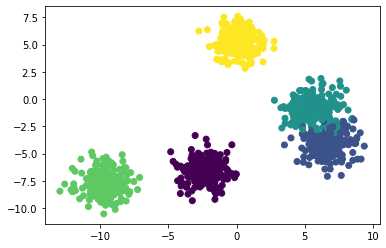

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [6]:
def visualize(K, y, centroids):
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200)
    plt.show();

In [4]:
kmeans = KMeans(n_clusters=K)
kmeans.fit(X)
print('labels: ', kmeans.labels_)
print('centroids: ', kmeans.cluster_centers_)

labels:  [1 2 3 3 1 4 0 4 2 4 3 4 3 1 3 0 3 1 2 4 3 0 1 3 4 0 2 2 0 3 4 0 1 0 2 3 3
 0 1 0 1 1 2 3 0 2 2 0 1 3 1 2 0 3 0 1 1 1 1 2 1 3 2 0 4 0 2 4 1 0 1 3 4 0
 3 2 2 2 4 0 3 0 1 0 2 0 2 0 4 3 0 3 1 3 2 0 2 1 0 2 4 4 2 2 0 3 0 2 2 3 3
 2 4 3 2 2 4 3 1 4 0 1 2 0 2 4 0 3 2 3 1 2 4 0 4 1 0 1 2 4 2 0 0 2 2 4 3 2
 3 3 4 3 1 4 4 4 3 1 2 2 2 0 2 0 3 1 1 0 1 0 4 1 1 1 0 2 4 2 3 0 1 0 3 4 3
 0 3 2 2 0 4 0 2 0 2 2 1 4 4 0 4 2 4 4 1 2 3 4 4 1 0 0 1 1 4 4 2 4 3 3 2 2
 4 3 2 2 0 4 3 2 2 2 3 2 3 2 1 3 3 3 2 4 1 0 3 0 0 0 3 4 0 2 4 4 3 1 3 0 0
 2 2 1 1 1 0 1 3 1 0 4 1 2 2 2 4 1 4 4 1 3 3 3 2 1 3 1 3 4 1 4 3 4 1 1 1 3
 0 3 2 0 2 3 4 4 0 0 3 4 1 3 1 3 4 2 0 0 4 2 0 4 0 4 2 2 3 0 2 3 3 3 1 4 4
 2 3 3 0 4 4 1 4 2 3 3 1 1 0 1 0 3 2 3 1 1 1 2 2 0 0 2 0 2 2 2 4 4 0 1 0 4
 4 4 3 4 1 4 0 3 4 2 1 1 1 2 4 2 2 3 4 1 4 2 4 2 0 0 2 4 3 2 3 0 4 0 1 3 0
 3 3 3 2 1 2 1 4 0 1 2 3 1 3 3 4 1 4 3 2 1 3 4 4 4 1 1 4 0 2 2 4 4 3 3 0 4
 3 4 4 4 1 4 4 4 0 2 2 4 1 2 4 2 4 3 4 0 0 2 2 2 3 3 0 2 3 3 3 1 0 4 1 4 3
 4 0 4 0 3 3 4 3

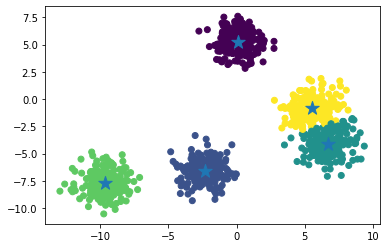

In [8]:
kmeans = KMeans(n_clusters=K)
kmeans.fit(X)
visualize(X, kmeans.labels_, kmeans.cluster_centers_)

# **K Nearest Neighbours (KNN)**

Lazy learning algorithm.

Can be used for both classification, regression problems.

1. Load data to memory
2. Choose value of K
3. To predict a specific class for a sample; iterate from 1 to no. of training samples.
    - Calc. dist. between test data to every sample in training data based on metric.
    - Dist. metrics: Euclide, Cosine, Chebyshev,...
    - Sorted the calculated distances in ascending based on distance values
    - Get top K distances
    - Get most frequent class from K distances
    - Return the predicted class

4. End


In [30]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier as KNN


In [31]:
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, shuffle=True)

In [32]:
def KNN_predict(X_train, y_train, x_test, K):
    distance = np.sqrt(np.sum(np.square(X_train - x_test), axis=1))
    neighbors = y_train[np.argpartition(distance, K)[:K]]
    values, counts = np.unique(neighbors, return_counts=True)
    prediction = values[np.argmax(counts)]
    return prediction

In [33]:
y_predict = np.zeros(y_test.shape)
for i, x_test in enumerate(X_test):
    y_predict[i] = KNN_predict(X_train, y_train, x_test, 3)

    accuracy = accuracy_score(y_predict, y_test)
    print(accuracy)

0.4
0.4
0.41333333333333333
0.4266666666666667
0.44
0.44
0.4533333333333333
0.4666666666666667
0.48
0.49333333333333335
0.5066666666666667
0.5066666666666667
0.5066666666666667
0.5066666666666667
0.5066666666666667
0.52
0.5333333333333333
0.5466666666666666
0.56
0.5733333333333334
0.5733333333333334
0.5866666666666667
0.5866666666666667
0.6
0.6133333333333333
0.6266666666666667
0.64
0.6533333333333333
0.6533333333333333
0.6533333333333333
0.6533333333333333
0.6533333333333333
0.6666666666666666
0.6666666666666666
0.6666666666666666
0.68
0.6933333333333334
0.6933333333333334
0.6933333333333334
0.6933333333333334
0.7066666666666667
0.72
0.7333333333333333
0.7333333333333333
0.7333333333333333
0.7466666666666667
0.7466666666666667
0.76
0.7733333333333333
0.7866666666666666
0.8
0.8133333333333334
0.8266666666666667
0.8266666666666667
0.84
0.8533333333333334
0.8533333333333334
0.8533333333333334
0.8533333333333334
0.8666666666666667
0.8666666666666667
0.8666666666666667
0.8666666666666667
0

In [34]:
knn = KNN(n_neighbors=3, p=2)
knn.fit(X_train, y_train)

KNN(n_neighbors=3)

KNeighborsClassifier(n_neighbors=3)

In [35]:
y_predict = knn.predict(X_test)
print(accuracy_score(y_predict, y_test))

0.9733333333333334
